In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

In [2]:
file_beef = Path("Beef84_22.csv")
file_eggs = Path("Eggs80_22.csv")
file_bread = Path("Bread80_22.csv")
file_chicken = Path("Chicken80_22.csv")
file_diesel = Path("Diesel98_22s.csv")
file_electric = Path("Electricity79_22.csv")
file_energy = Path("Energy00_22.csv")
file_flour = Path("Flour80_22.csv")
file_fuel = Path("Fuel79_22.csv")
file_gas = Path("Gasoline80_22.csv")
file_malt = Path("Malt96_22.csv")
file_medical = Path("Medical00_22.csv")
file_milk = Path("Milk95_22.csv")
file_pres = Path("Prescription80_22.csv")
file_shelter = Path("Shelter80_22.csv")
file_sugar = Path("Sugar80_22.csv")
file_utility = Path("Utility00_22.csv")

file_cpi = Path("CPI_Average.csv")

In [3]:

beef_file = pd.read_csv(file_beef)
eggs_file = pd.read_csv(file_eggs)
bread_file = pd.read_csv(file_bread)
chicken_file = pd.read_csv(file_chicken)
diesel_file = pd.read_csv(file_diesel)
electricity_file = pd.read_csv(file_electric)
energy_file = pd.read_csv(file_energy)
flour_file = pd.read_csv(file_flour)
fuel_file = pd.read_csv(file_fuel)
gasoline_file = pd.read_csv(file_gas)
malt_file = pd.read_csv(file_malt)
medical_file = pd.read_csv(file_medical)
milk_file = pd.read_csv(file_milk)
presecription_file = pd.read_csv(file_pres)
shelter_file = pd.read_csv(file_shelter)
sugar_file = pd.read_csv(file_sugar)
utility_file = pd.read_csv(file_utility)

CPI_file = pd.read_csv(file_cpi)

In [4]:
beef_file.head()
eggs_file.head()

,Year,Eggs
0,01-01-1980,0.879
1,02-01-1980,0.774
2,03-01-1980,0.812
3,04-01-1980,0.797
4,05-01-1980,0.737


In [5]:
df_beef = pd.DataFrame(beef_file)
df_beef.set_index(pd.to_datetime(df_beef['Year'], infer_datetime_format=True), inplace=True)
df_beef = df_beef.drop(columns=['Year'], axis=1)
df_beef = df_beef.pct_change()

df_eggs = pd.DataFrame(eggs_file)
df_eggs.set_index(pd.to_datetime(df_eggs['Year'], infer_datetime_format=True), inplace=True)
df_eggs = df_eggs.drop(columns=['Year'], axis=1)
df_eggs = df_eggs.pct_change()

df_bread = pd.DataFrame(bread_file)
df_bread.set_index(pd.to_datetime(df_bread['Year'], infer_datetime_format=True), inplace=True) 
df_bread = df_bread.drop(columns=['Year'], axis=1)
df_bread = df_bread.pct_change()

df_chicken = pd.DataFrame(chicken_file)
df_chicken.set_index(pd.to_datetime(df_chicken['Year'], infer_datetime_format=True), inplace=True)
df_chicken = df_chicken.drop(columns=['Year'], axis=1)
df_chicken  = df_chicken .pct_change()

df_diesel = pd.DataFrame(diesel_file)
df_diesel.set_index(pd.to_datetime(df_diesel ['Year'], infer_datetime_format=True), inplace=True)
df_diesel  = df_diesel .drop(columns=['Year'], axis=1)
df_diesel = df_diesel.pct_change()

df_electric = pd.DataFrame(electricity_file)
df_electric.set_index(pd.to_datetime(df_electric['Year'], infer_datetime_format=True), inplace=True)
df_electric = df_electric.drop(columns=['Year'], axis=1)
df_electric = df_electric.pct_change()

df_energy = pd.DataFrame(energy_file)
df_energy.set_index(pd.to_datetime(df_energy['Year'], infer_datetime_format=True), inplace=True)
df_energy = df_energy.drop(columns=['Year'], axis=1)
df_energy = df_energy.pct_change()


df_flour = pd.DataFrame(flour_file)
df_flour.set_index(pd.to_datetime(df_flour['Year'], infer_datetime_format=True), inplace=True)
df_flour = df_flour.drop(columns=['Year'], axis=1)
df_flour = df_flour.pct_change()


df_fuel = pd.DataFrame(fuel_file)
df_fuel.set_index(pd.to_datetime(df_fuel['Year'], infer_datetime_format=True), inplace=True)
df_fuel = df_fuel.drop(columns=['Year'], axis=1)
df_fuel = df_fuel.pct_change()

df_gas = pd.DataFrame(gasoline_file)
df_gas.set_index(pd.to_datetime(df_gas['Year'], infer_datetime_format=True), inplace=True)
df_gas = df_gas.drop(columns=['Year'], axis=1)
df_gas = df_gas.pct_change()


df_malt = pd.DataFrame(malt_file)
df_malt.set_index(pd.to_datetime(df_malt['Year'], infer_datetime_format=True), inplace=True)
df_malt = df_malt.drop(columns=['Year'], axis=1)
df_malt = df_malt.pct_change()


df_medical = pd.DataFrame(medical_file)
df_medical.set_index(pd.to_datetime(df_medical['Year'], infer_datetime_format=True), inplace=True)
df_medical = df_medical.drop(columns=['Year'], axis=1)
df_medical = df_medical.pct_change()


df_milk = pd.DataFrame(milk_file)
df_milk.set_index(pd.to_datetime(df_milk['Year'], infer_datetime_format=True), inplace=True)
df_milk = df_milk.drop(columns=['Year'], axis=1)
df_milk = df_milk.pct_change()



df_pres = pd.DataFrame(presecription_file)
df_pres.set_index(pd.to_datetime(df_pres['Year'], infer_datetime_format=True), inplace=True)
df_pres = df_pres.drop(columns=['Year'], axis=1)
df_pres = df_pres.pct_change()


df_shelter = pd.DataFrame(shelter_file)
df_shelter.set_index(pd.to_datetime(df_shelter ['Year'], infer_datetime_format=True), inplace=True)
df_shelter  = df_shelter.drop(columns=['Year'], axis=1)
df_shelter = df_shelter.pct_change()

df_sugar = pd.DataFrame(sugar_file)
df_sugar.set_index(pd.to_datetime(df_sugar['Year'], infer_datetime_format=True), inplace=True)
df_sugar = df_sugar.drop(columns=['Year'], axis=1)
df_sugar = df_sugar.pct_change()

df_utility = pd.DataFrame(utility_file)
df_utility.set_index(pd.to_datetime(df_utility['Year'], infer_datetime_format=True), inplace=True) 
df_utility = df_utility.drop(columns=['Year'], axis=1)
df_utility  = df_utility .pct_change()

df_cpi = pd.DataFrame(CPI_file)
df_cpi.set_index(pd.to_datetime(df_cpi['Year'], infer_datetime_format=True), inplace=True) 
df_cpi = df_cpi.drop(columns=['Year'], axis=1)
df_cpi  = df_cpi.pct_change()


In [6]:
df_beef.head()

,Beef
Year,
1980-01-01,NaN
1984-02-01,0.038760
1984-03-01,-0.023881
1984-04-01,0.017584
1984-05-01,-0.022539


In [7]:
df_inflation = pd.concat([df_beef , df_chicken,df_eggs, df_bread,df_diesel,df_electric,df_energy,df_flour,df_fuel, df_gas,df_malt, df_medical, df_milk,df_utility,df_sugar, df_shelter, df_cpi], axis="columns", join = "inner")

In [8]:
df_inflation.head(100)

,Beef,Chicken,Eggs,Bread,Diesel,Electric79_22,Energy,Flour,Fuel,Gasoline,Malt,Medical,Milk,Utility,Sugar,Shelter,CPI
Year,,,,,,,,,,,,,,,,,
2000-01-01,-0.029450,0.005698,0.059783,0.008899,0.025792,-0.011765,NaN,0.071161,0.092831,0.003587,0.058419,NaN,-0.031304,NaN,0.025822,0.007953,0.002971
2000-02-01,0.022252,-0.012276,-0.013333,0.018743,0.123563,0.011905,0.034930,-0.066434,0.357443,0.048257,-0.046537,0.005970,-0.002873,0.020937,-0.011442,0.004734,0.005924
2000-03-01,0.010554,0.017208,-0.032225,0.000000,0.014706,0.000000,0.050145,0.067416,-0.157993,0.115942,0.069240,0.003956,-0.010443,-0.005859,-0.006944,0.006283,0.008245
2000-04-01,0.033943,0.004699,0.008593,0.003247,-0.038437,0.000000,-0.010101,-0.007018,-0.053716,-0.022918,-0.057325,0.001970,0.009098,0.000000,-0.034965,0.000520,0.000584
2000-05-01,-0.008838,-0.015903,-0.092652,-0.012945,-0.009174,0.000000,0.001855,0.067138,-0.017885,-0.002346,0.052928,0.002950,0.003246,0.008841,0.024155,0.000520,0.001168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-12-01,-0.024028,0.004307,0.127282,0.036437,0.000292,0.000000,-0.006429,0.025773,0.024613,-0.015915,-0.039439,0.002534,-0.008709,0.004128,-0.013725,0.000681,-0.000671
2008-01-01,0.042077,-0.002573,0.036208,0.000781,-0.002921,0.008696,0.009080,0.057789,0.027718,0.009923,0.055657,0.007051,0.000258,0.008501,0.031809,0.006185,0.004971
2008-02-01,0.022766,-0.003439,-0.003218,0.031226,0.010841,0.000000,0.000512,0.080760,0.000300,-0.005757,-0.032844,0.005105,-0.000517,0.006404,-0.011561,0.003752,0.002904


In [9]:
df_inflation.tail(20)

,Beef,Chicken,Eggs,Bread,Diesel,Electric79_22,Energy,Flour,Fuel,Gasoline,Malt,Medical,Milk,Utility,Sugar,Shelter,CPI
Year,,,,,,,,,,,,,,,,,
2020-10-01,-0.016683,0.024643,0.040650,0.007373,-0.014423,-0.014599,-0.012088,0.002217,0.007537,-0.015805,0.004714,-0.002924,-0.019722,-0.005923,0.006349,0.000480,0.000415
2020-11-01,0.004741,0.037342,0.029830,0.007984,-0.007724,0.007407,-0.010557,-0.015487,0.032258,-0.026884,0.011394,-0.001318,0.013314,0.003021,0.041009,0.000495,-0.000611
2020-12-01,-0.018873,-0.010982,0.021379,0.015182,0.041786,0.000000,0.019051,0.011236,0.095562,0.034012,-0.001988,-0.001532,0.032117,0.006097,0.021212,0.000815,0.000941
2021-01-01,0.003543,-0.016039,-0.010128,0.005202,0.046402,0.000000,0.032734,-0.008889,0.053741,0.069158,-0.007968,0.007189,-0.018953,0.006732,0.011869,0.001770,0.004254
2021-02-01,0.005549,-0.007524,0.089359,-0.005821,0.052988,0.007353,0.035419,-0.013453,0.094547,0.068865,0.002677,0.004896,-0.028835,0.009611,-0.002933,0.002202,0.005474
2021-03-01,0.013795,-0.025268,0.017533,-0.007157,0.097787,0.007299,0.052757,-0.009091,0.029749,0.117115,0.000000,0.001441,-0.005938,0.002082,-0.007353,0.003395,0.007083
2021-04-01,0.013360,-0.018146,-0.003077,-0.010485,0.016255,0.007246,0.014460,0.002294,-0.030630,0.019992,-0.005340,-0.000360,0.029570,0.007324,0.000000,0.003732,0.008219
2021-05-01,0.001221,-0.019142,0.003086,0.000662,0.023672,0.007194,0.026547,0.004577,0.014363,0.041832,0.010738,-0.000784,0.014505,0.008316,0.000000,0.003320,0.008017
2021-06-01,0.062424,-0.008075,0.010462,-0.000662,0.022500,0.014286,0.022994,-0.189066,0.044956,0.022073,0.017264,-0.001320,0.017158,0.018706,0.000000,0.005318,0.009291


In [10]:
df_inflation = df_inflation.fillna(method='pad')

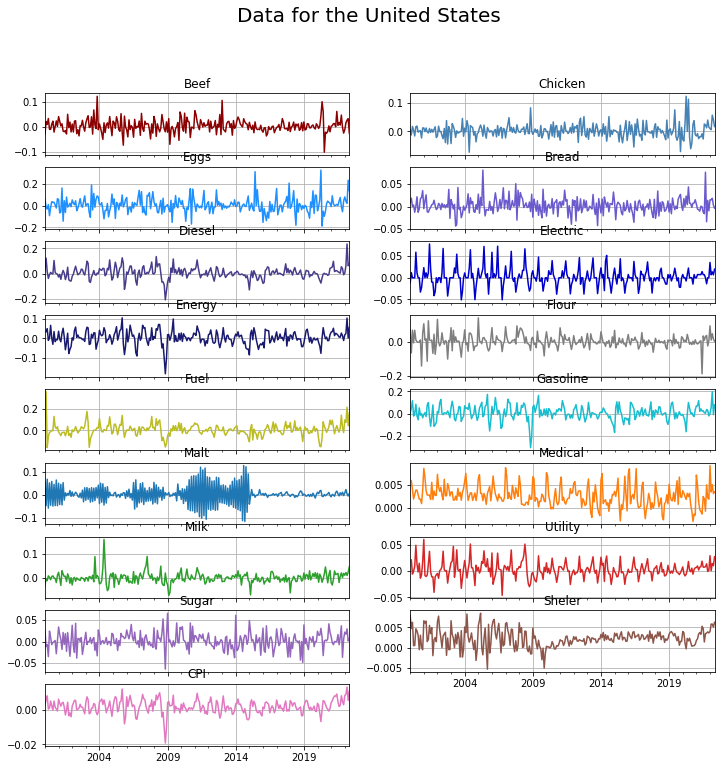

In [11]:
df_inflation.plot(kind ='line',
            subplots = True,
            grid = True,
            figsize = (12,12),
            title = ['Beef', 'Chicken', 'Eggs', 'Bread', 'Diesel', 'Electric', 'Energy', 'Flour','Fuel','Gasoline','Malt','Medical','Milk','Utility','Sugar','Sheler','CPI'],
            layout = (9,2),
            sharex = True,
            sharey = False,
            legend = False,
            style = ['darkred', 'steelblue', 'dodgerblue', 'slateblue', 'darkslateblue', 'mediumblue', 'midnightblue'])

[ax.set_xlabel('') for ax in plt.gcf().axes]
plt.suptitle('Data for the United States', fontsize = 20)
plt.show()



In [12]:
df_for_training = df_inflation[0:14].astype(float)

In [13]:
df_for_training

,Beef,Chicken,Eggs,Bread,Diesel,Electric79_22,Energy,Flour,Fuel,Gasoline,Malt,Medical,Milk,Utility,Sugar,Shelter,CPI
Year,,,,,,,,,,,,,,,,,
2000-01-01,-0.029450,0.005698,0.059783,0.008899,0.025792,-0.011765,NaN,0.071161,0.092831,0.003587,0.058419,NaN,-0.031304,NaN,0.025822,0.007953,0.002971
2000-02-01,0.022252,-0.012276,-0.013333,0.018743,0.123563,0.011905,0.034930,-0.066434,0.357443,0.048257,-0.046537,0.005970,-0.002873,0.020937,-0.011442,0.004734,0.005924
2000-03-01,0.010554,0.017208,-0.032225,0.000000,0.014706,0.000000,0.050145,0.067416,-0.157993,0.115942,0.069240,0.003956,-0.010443,-0.005859,-0.006944,0.006283,0.008245
2000-04-01,0.033943,0.004699,0.008593,0.003247,-0.038437,0.000000,-0.010101,-0.007018,-0.053716,-0.022918,-0.057325,0.001970,0.009098,0.000000,-0.034965,0.000520,0.000584
2000-05-01,-0.008838,-0.015903,-0.092652,-0.012945,-0.009174,0.000000,0.001855,0.067138,-0.017885,-0.002346,0.052928,0.002950,0.003246,0.008841,0.024155,0.000520,0.001168
2000-06-01,-0.008917,0.016160,-0.016432,0.000000,0.009921,0.058824,0.067593,0.009934,-0.011085,0.083856,-0.044920,0.003922,-0.006830,0.048685,0.009434,0.004678,0.005248
2000-07-01,0.011568,0.018709,0.035800,0.021858,0.000000,0.011111,0.000867,0.000000,0.000801,-0.020969,0.059351,0.003906,0.006515,0.012999,-0.007009,0.004139,0.002320
2000-08-01,0.023507,-0.002755,0.028802,-0.012834,-0.001965,0.000000,-0.030329,-0.003279,-0.003200,-0.056869,-0.048626,0.002918,0.009349,-0.001833,-0.002353,0.003091,0.000000
2000-09-01,-0.019863,0.000921,0.030235,-0.005417,0.104331,0.000000,0.035746,-0.003289,0.129213,0.051684,0.046667,0.001940,0.000713,0.014692,0.000000,-0.000514,0.005208


In [14]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [15]:
trainX = []
trainY = []

In [16]:
n_future = 1
n_past =  14

In [17]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [18]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [19]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (0,).
trainY shape == (0,).


In [20]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

IndexError: tuple index out of range

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.7, verbose=1)

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()